In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [494]:
pd.pandas.set_option('display.max_columns',None)

In [495]:
df = pd.read_csv('EPIC_Analytics Case2_Dealer Segmentation.csv')
df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,Dealer 1,04-07-2020 14:04,WB,EAST I,REALME,Rural,30-04-2022,9,161449,4,Mass,2,0,0,0,0,0,2,0,0,0,0,1,NaN,DI,CD
1,Dealer 2,04-07-2020 14:04,WB,EAST I,REALME,Rural,13-12-2022,6,107783,6,Middle Class,1,0,0,0,1,1,6,0,0,0,0,0,NaN,DI,Mobile
2,Dealer 3,04-07-2020 14:04,WB,EAST I,SAMSUNG,Metro,29-04-2023,31,623401,16,Mass,8,9,4,1,22,31,13,0,0,0,0,8,29.0,DI,Mobile
3,Dealer 4,04-07-2020 14:04,MH,MH,APPLE,Metro,11-07-2022,3,43567,1,Mass,0,0,0,0,0,0,0,0,0,0,0,0,NaN,DI,NaN
4,Dealer 5,04-07-2020 14:04,MH,MH,OPPO,Large Metro,23-06-2023,304,6036796,24,Mass,71,0,0,0,0,1,0,0,0,0,0,0,33.0,DI,Common


In [496]:
df['V5'].unique()

array(['Rural', 'Metro', 'Large Metro', 'Megapolis (B)', 'Urban',
       'Semi-Urban', nan, 'Megapolis (A)'], dtype=object)

In [497]:
df['V10'].unique()

array(['Mass', 'Middle Class', 'Upper Middle Class', 'Affluent',
       'Supper Affluent'], dtype=object)

In [498]:
df['V24'].unique()

array(['DI', 'RR', nan], dtype=object)

In [499]:
df['V5'] = df['V5'].map({'Rural': 0, 'Metro': 1, 'Large Metro': 2,'Megapolis (B)': 3, 'Urban': 4, 'Semi-Urban': 5, 'Megapolis (A)': 6})
df['V10'] = df['V10'].map({'Mass': 0, 'Middle Class': 1, 'Upper Middle Class': 2,'Affluent': 3, 'Supper Affluent': 4})
df['V24'] = df['V24'].map({'DI': 0, 'RR': 1})
df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,Dealer 1,04-07-2020 14:04,WB,EAST I,REALME,0.0,30-04-2022,9,161449,4,0,2,0,0,0,0,0,2,0,0,0,0,1,NaN,0.0,CD
1,Dealer 2,04-07-2020 14:04,WB,EAST I,REALME,0.0,13-12-2022,6,107783,6,1,1,0,0,0,1,1,6,0,0,0,0,0,NaN,0.0,Mobile
2,Dealer 3,04-07-2020 14:04,WB,EAST I,SAMSUNG,1.0,29-04-2023,31,623401,16,0,8,9,4,1,22,31,13,0,0,0,0,8,29.0,0.0,Mobile
3,Dealer 4,04-07-2020 14:04,MH,MH,APPLE,1.0,11-07-2022,3,43567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN
4,Dealer 5,04-07-2020 14:04,MH,MH,OPPO,2.0,23-06-2023,304,6036796,24,0,71,0,0,0,0,1,0,0,0,0,0,0,33.0,0.0,Common
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,Dealer 33360,04-07-2020 14:04,TN,TN I,IFB,4.0,12-05-2023,103,2958703,21,2,21,16,8,0,54,73,58,11,16,12,12,16,35.0,1.0,Common
33360,Dealer 33361,02-11-2021 00:00,WB,EAST I,OPPO,0.0,25-03-2022,2,37080,2,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN
33361,Dealer 33362,04-07-2020 14:04,TN,TN I,HP,1.0,23-06-2022,19,715507,4,2,4,1,0,0,0,1,24,20,21,17,15,18,39.0,1.0,CD
33362,Dealer 33363,06-04-2023 00:00,TN,TN II,OPPO,0.0,18-06-2023,7,119368,2,0,0,5,7,0,29,37,1,0,0,0,0,1,41.0,NaN,Common


In [500]:
df['V18'] = df['V18']*0.2+df['V19']*0.2+df['V20']*0.3+df['V21']*0.3+df['V22']*0.2
df = df.drop(['V19','V20','V21','V22'],axis=1)
df

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V23,V24,V25
0,Dealer 1,04-07-2020 14:04,WB,EAST I,REALME,0.0,30-04-2022,9,161449,4,0,2,0,0,0,0,0,2,0.2,NaN,0.0,CD
1,Dealer 2,04-07-2020 14:04,WB,EAST I,REALME,0.0,13-12-2022,6,107783,6,1,1,0,0,0,1,1,6,0.0,NaN,0.0,Mobile
2,Dealer 3,04-07-2020 14:04,WB,EAST I,SAMSUNG,1.0,29-04-2023,31,623401,16,0,8,9,4,1,22,31,13,1.6,29.0,0.0,Mobile
3,Dealer 4,04-07-2020 14:04,MH,MH,APPLE,1.0,11-07-2022,3,43567,1,0,0,0,0,0,0,0,0,0.0,NaN,0.0,NaN
4,Dealer 5,04-07-2020 14:04,MH,MH,OPPO,2.0,23-06-2023,304,6036796,24,0,71,0,0,0,0,1,0,0.0,33.0,0.0,Common
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,Dealer 33360,04-07-2020 14:04,TN,TN I,IFB,4.0,12-05-2023,103,2958703,21,2,21,16,8,0,54,73,58,15.8,35.0,1.0,Common
33360,Dealer 33361,02-11-2021 00:00,WB,EAST I,OPPO,0.0,25-03-2022,2,37080,2,0,0,0,0,0,0,0,0,0.0,NaN,0.0,NaN
33361,Dealer 33362,04-07-2020 14:04,TN,TN I,HP,1.0,23-06-2022,19,715507,4,2,4,1,0,0,0,1,24,21.4,39.0,1.0,CD
33362,Dealer 33363,06-04-2023 00:00,TN,TN II,OPPO,0.0,18-06-2023,7,119368,2,0,0,5,7,0,29,37,1,0.2,41.0,NaN,Common


In [501]:
df['V25'].isna().sum()

2121

In [502]:
data = df.copy()

In [503]:
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>0 and data[feature].dtypes!='O']


for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    data[feature].fillna(median_value,inplace=True)

data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V23,V24,V25
0,Dealer 1,04-07-2020 14:04,WB,EAST I,REALME,0.0,30-04-2022,9,161449,4,0,2,0,0,0,0,0,2,0.2,39.0,0.0,CD
1,Dealer 2,04-07-2020 14:04,WB,EAST I,REALME,0.0,13-12-2022,6,107783,6,1,1,0,0,0,1,1,6,0.0,39.0,0.0,Mobile
2,Dealer 3,04-07-2020 14:04,WB,EAST I,SAMSUNG,1.0,29-04-2023,31,623401,16,0,8,9,4,1,22,31,13,1.6,29.0,0.0,Mobile
3,Dealer 4,04-07-2020 14:04,MH,MH,APPLE,1.0,11-07-2022,3,43567,1,0,0,0,0,0,0,0,0,0.0,39.0,0.0,NaN
4,Dealer 5,04-07-2020 14:04,MH,MH,OPPO,2.0,23-06-2023,304,6036796,24,0,71,0,0,0,0,1,0,0.0,33.0,0.0,Common
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,Dealer 33360,04-07-2020 14:04,TN,TN I,IFB,4.0,12-05-2023,103,2958703,21,2,21,16,8,0,54,73,58,15.8,35.0,1.0,Common
33360,Dealer 33361,02-11-2021 00:00,WB,EAST I,OPPO,0.0,25-03-2022,2,37080,2,0,0,0,0,0,0,0,0,0.0,39.0,0.0,NaN
33361,Dealer 33362,04-07-2020 14:04,TN,TN I,HP,1.0,23-06-2022,19,715507,4,2,4,1,0,0,0,1,24,21.4,39.0,1.0,CD
33362,Dealer 33363,06-04-2023 00:00,TN,TN II,OPPO,0.0,18-06-2023,7,119368,2,0,0,5,7,0,29,37,1,0.2,41.0,0.0,Common


In [504]:
data['V23'].isnull().sum()

0

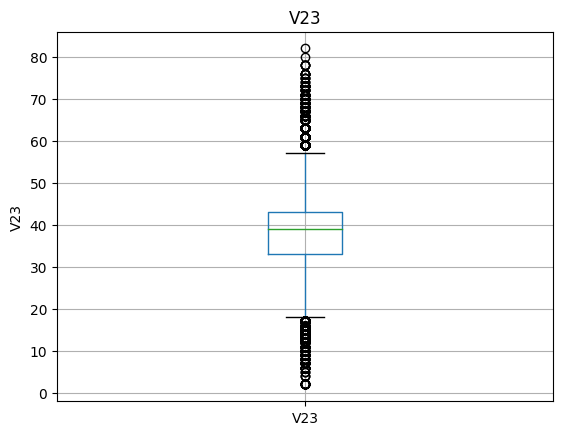

In [505]:
feature = 'V23'
# data[feature]=np.log(data[feature])
data.boxplot(column=feature)
plt.ylabel(feature)
plt.title(feature)
plt.show()

# if 0 in data[feature].unique():
#     print(0)
# else:
#     data[feature]=np.log(data[feature])
   

In [506]:

q1 = np.percentile(data['V23'], 25)
q3 = np.percentile(data['V23'], 75)
iqr = q3 - q1

# Calculate the upper bound for outliers
upper_bound = q3 + 1.5 * iqr
upper_bound

58.0

In [507]:

q1_1 = np.percentile(data['V18'], 25)
q3_1 = np.percentile(data['V18'], 75)
iqr_1 = q3_1 - q1_1

# Calculate the upper bound for outliers
upper_bound1 = q3_1 + 1.5 * iqr_1
upper_bound1

26.200000000000003

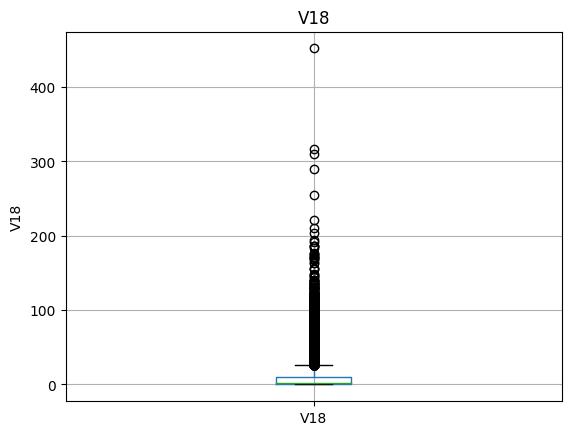

In [508]:
feature1 = 'V18'
# data[feature]=np.log(data[feature])
data.boxplot(column=feature1)
plt.ylabel(feature1)
plt.title(feature1)
plt.show()

In [509]:
data['Fraud'] = data['V23'].apply(lambda x: 0 if x < upper_bound else 1)
count = (data['Fraud']==1).sum()
count

1201

In [510]:
data1 = data.copy()
# High risk = 1, Low risk = 0
data1['Risk'] = data1['V18'].apply(lambda x: 0 if x < 25 else 1)
count = (data1['Risk']==1).sum()
count

3448

In [511]:
data['V13']=df['V13']-df['V12']
data = data.drop('V12',axis=1)
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V13,V14,V15,V16,V17,V18,V23,V24,V25,Fraud
0,Dealer 1,04-07-2020 14:04,WB,EAST I,REALME,0.0,30-04-2022,9,161449,4,0,2,0,0,0,0,2,0.2,39.0,0.0,CD,0
1,Dealer 2,04-07-2020 14:04,WB,EAST I,REALME,0.0,13-12-2022,6,107783,6,1,1,0,0,1,1,6,0.0,39.0,0.0,Mobile,0
2,Dealer 3,04-07-2020 14:04,WB,EAST I,SAMSUNG,1.0,29-04-2023,31,623401,16,0,8,-5,1,22,31,13,1.6,29.0,0.0,Mobile,0
3,Dealer 4,04-07-2020 14:04,MH,MH,APPLE,1.0,11-07-2022,3,43567,1,0,0,0,0,0,0,0,0.0,39.0,0.0,NaN,0
4,Dealer 5,04-07-2020 14:04,MH,MH,OPPO,2.0,23-06-2023,304,6036796,24,0,71,0,0,0,1,0,0.0,33.0,0.0,Common,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,Dealer 33360,04-07-2020 14:04,TN,TN I,IFB,4.0,12-05-2023,103,2958703,21,2,21,-8,0,54,73,58,15.8,35.0,1.0,Common,0
33360,Dealer 33361,02-11-2021 00:00,WB,EAST I,OPPO,0.0,25-03-2022,2,37080,2,0,0,0,0,0,0,0,0.0,39.0,0.0,NaN,0
33361,Dealer 33362,04-07-2020 14:04,TN,TN I,HP,1.0,23-06-2022,19,715507,4,2,4,-1,0,0,1,24,21.4,39.0,1.0,CD,0
33362,Dealer 33363,06-04-2023 00:00,TN,TN II,OPPO,0.0,18-06-2023,7,119368,2,0,0,2,0,29,37,1,0.2,41.0,0.0,Common,0


In [512]:
# # Active= 0, passive =1, deactivated=2
# data['Flag'] = 

In [513]:
data1['V1'] = pd.to_datetime(data1['V1'],dayfirst=True)
data1['V6'] = pd.to_datetime(data1['V6'],dayfirst=True)

data1['V1'] = data1['V6']-data1['V1']

data1['V1']

0        664 days 09:56:00
1        891 days 09:56:00
2       1028 days 09:56:00
3        736 days 09:56:00
4       1083 days 09:56:00
               ...        
33359   1041 days 09:56:00
33360    143 days 00:00:00
33361    718 days 09:56:00
33362     73 days 00:00:00
33363    811 days 09:56:00
Name: V1, Length: 33364, dtype: timedelta64[ns]

In [514]:
data1['V1']=data1['V1'].dt.days
data1

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V23,V24,V25,Fraud,Risk
0,Dealer 1,664,WB,EAST I,REALME,0.0,2022-04-30,9,161449,4,0,2,0,0,0,0,0,2,0.2,39.0,0.0,CD,0,0
1,Dealer 2,891,WB,EAST I,REALME,0.0,2022-12-13,6,107783,6,1,1,0,0,0,1,1,6,0.0,39.0,0.0,Mobile,0,0
2,Dealer 3,1028,WB,EAST I,SAMSUNG,1.0,2023-04-29,31,623401,16,0,8,9,4,1,22,31,13,1.6,29.0,0.0,Mobile,0,0
3,Dealer 4,736,MH,MH,APPLE,1.0,2022-07-11,3,43567,1,0,0,0,0,0,0,0,0,0.0,39.0,0.0,NaN,0,0
4,Dealer 5,1083,MH,MH,OPPO,2.0,2023-06-23,304,6036796,24,0,71,0,0,0,0,1,0,0.0,33.0,0.0,Common,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,Dealer 33360,1041,TN,TN I,IFB,4.0,2023-05-12,103,2958703,21,2,21,16,8,0,54,73,58,15.8,35.0,1.0,Common,0,0
33360,Dealer 33361,143,WB,EAST I,OPPO,0.0,2022-03-25,2,37080,2,0,0,0,0,0,0,0,0,0.0,39.0,0.0,NaN,0,0
33361,Dealer 33362,718,TN,TN I,HP,1.0,2022-06-23,19,715507,4,2,4,1,0,0,0,1,24,21.4,39.0,1.0,CD,0,0
33362,Dealer 33363,73,TN,TN II,OPPO,0.0,2023-06-18,7,119368,2,0,0,5,7,0,29,37,1,0.2,41.0,0.0,Common,0,0


In [515]:
data2 = data.copy()
data2['V7'] = data2['V7'].apply(lambda x: 0 if x < 5 else 1)
count = (data2['V7']==0).sum()
count

4397

In [517]:
# deactivated=0, active=1, passive=2
condition1 = data['Fraud']==1
condition2 = data['V7']<5

data['Flag']=np.where(condition1, 0, np.where(condition2, 0,1))
data['Duration']=data1['V1']
data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V13,V14,V15,V16,V17,V18,V23,V24,V25,Fraud,Flag,Duration
0,Dealer 1,04-07-2020 14:04,WB,EAST I,REALME,0.0,30-04-2022,9,161449,4,0,2,0,0,0,0,2,0.2,39.0,0.0,CD,0,1,664
1,Dealer 2,04-07-2020 14:04,WB,EAST I,REALME,0.0,13-12-2022,6,107783,6,1,1,0,0,1,1,6,0.0,39.0,0.0,Mobile,0,1,891
2,Dealer 3,04-07-2020 14:04,WB,EAST I,SAMSUNG,1.0,29-04-2023,31,623401,16,0,8,-5,1,22,31,13,1.6,29.0,0.0,Mobile,0,1,1028
3,Dealer 4,04-07-2020 14:04,MH,MH,APPLE,1.0,11-07-2022,3,43567,1,0,0,0,0,0,0,0,0.0,39.0,0.0,NaN,0,0,736
4,Dealer 5,04-07-2020 14:04,MH,MH,OPPO,2.0,23-06-2023,304,6036796,24,0,71,0,0,0,1,0,0.0,33.0,0.0,Common,0,1,1083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,Dealer 33360,04-07-2020 14:04,TN,TN I,IFB,4.0,12-05-2023,103,2958703,21,2,21,-8,0,54,73,58,15.8,35.0,1.0,Common,0,1,1041
33360,Dealer 33361,02-11-2021 00:00,WB,EAST I,OPPO,0.0,25-03-2022,2,37080,2,0,0,0,0,0,0,0,0.0,39.0,0.0,NaN,0,0,143
33361,Dealer 33362,04-07-2020 14:04,TN,TN I,HP,1.0,23-06-2022,19,715507,4,2,4,-1,0,0,1,24,21.4,39.0,1.0,CD,0,1,718
33362,Dealer 33363,06-04-2023 00:00,TN,TN II,OPPO,0.0,18-06-2023,7,119368,2,0,0,2,0,29,37,1,0.2,41.0,0.0,Common,0,1,73
